In [1]:
import math
import os
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
path = '/home/groups/ChangLab/heussner/coexist/figures/2/2A/Cell_tracking_results'
table_path = '/home/groups/ChangLab/heussner/tma-integration/data/nuc_tables'
cores = ['A10','A5','A6','A8','B10','B1','B3','B4',
         'B6','B7','B9','C10','C1','D11','D2','D8',
         'E10','E3','E5','E6','E8','E9','F11','F1','F2','F7',
         'G11','G1','G3','G7','G9','H10',
         'H2','H3','H4','H6','H7','H8','H9']

fractions = []

for c in tqdm(cores):
    table = pd.read_csv(os.path.join(table_path,f'{c}_tCyCIF_immune_nuc.csv'))
    track = pd.read_csv(os.path.join(path,f'{c}.csv'))
    track = track[track['tumor_id']>0]
    fractions.append(len(track)/len(table)*100)

100%|████████████████████████████████| 39/39 [00:17<00:00,  2.18it/s]


In [3]:
with open('simulation_results.pkl','rb') as handle:
    results = pickle.load(handle)

In [4]:
simulation = []
for c in cores:
    simulation.append(results[c])

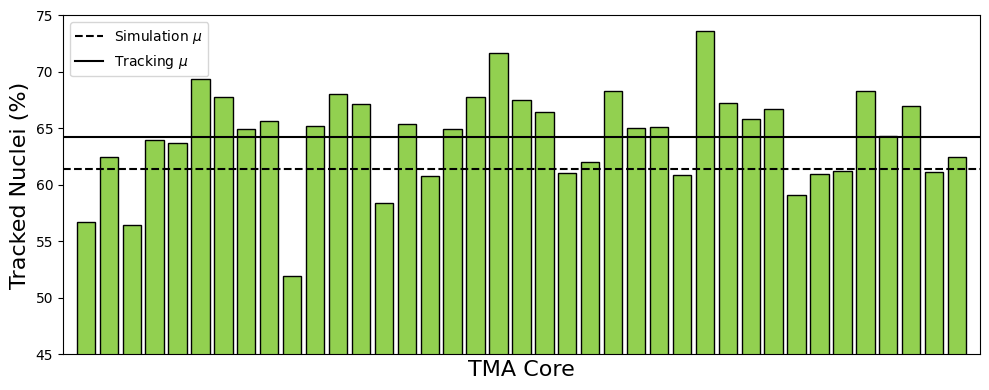

In [9]:
labels = [i for i in range(len(cores))]
plt.figure(figsize=(10,4))
plt.bar(labels, fractions,color='#92D050',edgecolor='black')
plt.axhline(np.mean(simulation)*100, color='black',linestyle='--', label=r'Simulation $\mu$')
plt.axhline(np.mean(fractions),color='black',linestyle='-',label=r'Tracking $\mu$')
plt.xlabel('TMA Core',fontsize=16)
plt.ylim([45,75])
plt.xlim([-1,len(cores)])
plt.xticks([])
plt.ylabel('Tracked Nuclei (%)',fontsize=16)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('simulation_fig.png',dpi=1200)
plt.show()